In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_analyst = pd.read_csv('../../ficheros/dataframe_estudio.csv', index_col = 0)
df_analyst.head(5)

,country,current_role,yearly_compensation,programming_languages,ides,visualization,activities,gender,primary_tool,ages
16,Belgium,Data Analyst,"2,000-2,999","Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn ,Plotly / Plotly Express",Analyze and understand data to influence produ...,Man,"Local development environments (RStudio, Jupyt...",mediana
32,United States of America,Data Analyst,unknown,R,RStudio,Ggplot / ggplot2,unknown,Nonbinary,unknown,joven
33,Egypt,Data Analyst,"7,500-9,999",Python,"Notepad++,Jupyter Notebook",None,Analyze and understand data to influence produ...,Woman,"Basic statistical software (Microsoft Excel, G...",mediana
46,China,Data Analyst,0-999,"Python, SQL, C, C++, Java, Javascript, MATLAB","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Plotly / Plotly Express",Analyze and understand data to influence produ...,Man,"Basic statistical software (Microsoft Excel, G...",joven
52,South Africa,Data Analyst,"25,000-29,999","R, SQL","RStudio ,Jupyter Notebook","Plotly / Plotly Express ,Ggplot / ggplot2 ,Shiny",Analyze and understand data to influence produ...,Man,"Local development environments (RStudio, Jupyt...",mediana


# Qué actividades realiza un Data Analyst en su día a día ? ¿La situación es la misma para España que para el resto de países? 

## Limpieza

In [5]:
df_analyst.iloc[3,6]

'Analyze and understand data to influence product or business decisions, Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data, Build prototypes to explore applying machine learning to new areas, Build and/or run a machine learning service that operationally improves my product or workflows'

In [6]:
df_analyst['activities'].unique()

array(['Analyze and understand data to influence product or business decisions',
       'unknown',
       'Analyze and understand data to influence product or business decisions, Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data, Build prototypes to explore applying machine learning to new areas, Build and/or run a machine learning service that operationally improves my product or workflows',
       'Analyze and understand data to influence product or business decisions, Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
       'None of these activities are an important part of my role at work',
       'Analyze and understand data to influence product or business decisions, Experimentation and iteration to improve existing ML models',
       'Analyze and understand data to influence product or business decisions, Build and/or run the data infrastructure that my

In [7]:
df_analyst['activities'].unique()

array(['Analyze and understand data to influence product or business decisions',
       'unknown',
       'Analyze and understand data to influence product or business decisions, Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data, Build prototypes to explore applying machine learning to new areas, Build and/or run a machine learning service that operationally improves my product or workflows',
       'Analyze and understand data to influence product or business decisions, Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
       'None of these activities are an important part of my role at work',
       'Analyze and understand data to influence product or business decisions, Experimentation and iteration to improve existing ML models',
       'Analyze and understand data to influence product or business decisions, Build and/or run the data infrastructure that my

In [8]:
def crear_filas(df,patron,columna):
    """
    Esta función divide la respuesta de cada individuo en cada una de las actividades que realiza
    Args: 
    df(df):dataframe sobre el que queremos aplicar los cambios
    patron(string): es el patron por el que nuestra función nos va a hacer la separación
    columna(string): es el nombre de la columna sobre la que queremos aplicar nuestra función
    """
    
    df[columna] = df[columna].str.split(patron, n = -1) 
    
    return df.explode(columna)

In [9]:
df_final = crear_filas(df_analyst, ', ', 'activities')
df_final 

,country,current_role,yearly_compensation,programming_languages,ides,visualization,activities,gender,primary_tool,ages
16,Belgium,Data Analyst,"2,000-2,999","Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn ,Plotly / Plotly Express",Analyze and understand data to influence produ...,Man,"Local development environments (RStudio, Jupyt...",mediana
32,United States of America,Data Analyst,unknown,R,RStudio,Ggplot / ggplot2,unknown,Nonbinary,unknown,joven
33,Egypt,Data Analyst,"7,500-9,999",Python,"Notepad++,Jupyter Notebook",None,Analyze and understand data to influence produ...,Woman,"Basic statistical software (Microsoft Excel, G...",mediana
46,China,Data Analyst,0-999,"Python, SQL, C, C++, Java, Javascript, MATLAB","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Plotly / Plotly Express",Analyze and understand data to influence produ...,Man,"Basic statistical software (Microsoft Excel, G...",joven
46,China,Data Analyst,0-999,"Python, SQL, C, C++, Java, Javascript, MATLAB","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Plotly / Plotly Express",Build and/or run the data infrastructure that ...,Man,"Basic statistical software (Microsoft Excel, G...",joven
...,...,...,...,...,...,...,...,...,...,...
25966,India,Data Analyst,"3,000-3,999","Python, C","PyCharm ,Jupyter Notebook","Matplotlib ,Seaborn ,Ggplot / ggplot2",Experimentation and iteration to improve exist...,Man,unknown,mediana
25968,Egypt,Data Analyst,"15,000-19,999","Python, SQL, Javascript, Bash","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn",Analyze and understand data to influence produ...,Man,"Business intelligence software (Salesforce, Ta...",mediana
25968,Egypt,Data Analyst,"15,000-19,999","Python, SQL, Javascript, Bash","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn",Build and/or run the data infrastructure that ...,Man,"Business intelligence software (Salesforce, Ta...",mediana
25968,Egypt,Data Analyst,"15,000-19,999","Python, SQL, Javascript, Bash","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn",analyzing,Man,"Business intelligence software (Salesforce, Ta...",mediana


In [10]:
df_final['activities'].unique()

array(['Analyze and understand data to influence product or business decisions',
       'unknown',
       'Build and/or run the data infrastructure that my business uses for storing',
       'analyzing', 'and operationalizing data',
       'Build prototypes to explore applying machine learning to new areas',
       'Build and/or run a machine learning service that operationally improves my product or workflows',
       'None of these activities are an important part of my role at work',
       'Experimentation and iteration to improve existing ML models',
       'Do research that advances the state of the art of machine learning',
       'Other'], dtype=object)

In [11]:
def limpiar_actividades(columna):
    """
    Esta función modifica la información de una columna
    Args
    columna(string): es la columna sobre la que queremos aplicar nuestra función
    Returns: nos devuelve la información modificada
    """ 
    if columna == 'Build and/or run the data infrastructure that my business uses for storing':
        return 'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data'
    
    elif columna == 'analyzing':
        return 'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data'
    
    elif columna == 'and operationalizing data':
        return 'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data'
    
    else:
        return columna

In [12]:
df_final['activities'] = df_final['activities'].apply(limpiar_actividades)

In [13]:
df_final['activities'].unique()

array(['Analyze and understand data to influence product or business decisions',
       'unknown',
       'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
       'Build prototypes to explore applying machine learning to new areas',
       'Build and/or run a machine learning service that operationally improves my product or workflows',
       'None of these activities are an important part of my role at work',
       'Experimentation and iteration to improve existing ML models',
       'Do research that advances the state of the art of machine learning',
       'Other'], dtype=object)

In [14]:
df_final['ides'].unique()

array(['Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Jupyter Notebook',
       'RStudio ', ' Notepad++,Jupyter Notebook',
       'Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Visual Studio ,Visual Studio Code (VSCode) ,PyCharm ,MATLAB ,Jupyter Notebook',
       'RStudio ,Jupyter Notebook', 'PyCharm , Spyder', ' None',
       'Jupyter Notebook, Other', 'Visual Studio ,Jupyter Notebook',
       'Jupyter Notebook',
       'Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Visual Studio Code (VSCode) ,Jupyter Notebook',
       'Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Visual Studio ,PyCharm , Notepad++,Jupyter Notebook',
       'Jupyter (JupyterLab, Jupyter Notebooks, etc) ,RStudio , Spyder',
       ' Spyder',
       'Jupyter (JupyterLab, Jupyter Notebooks, etc) ,Visual Studio Code (VSCode) ,PyCharm ,Jupyter Notebook',
       'Visual Studio ', 'PyCharm ,Jupyter Notebook',
       'Jupyter (JupyterLab, Jupyter Notebooks, etc) ,RStudio ,PyCharm , Spyder, Sublime Text,Jupyter Notebook',
   

In [15]:
df_final.head(2)

,country,current_role,yearly_compensation,programming_languages,ides,visualization,activities,gender,primary_tool,ages
16,Belgium,Data Analyst,"2,000-2,999","Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn ,Plotly / Plotly Express",Analyze and understand data to influence produ...,Man,"Local development environments (RStudio, Jupyt...",mediana
32,United States of America,Data Analyst,unknown,R,RStudio,Ggplot / ggplot2,unknown,Nonbinary,unknown,joven


## Visualización

Para este análisis decidimos filtrar por aquellos 2 países en los que más gente haya respondido y compararlo con España. Queremos averiguar si se realizan las mismas actividades en los países en los que más se ha respondido comparado con España

In [16]:
df_paises_mas = df_analyst['country'].value_counts().sort_values(ascending = False).head(2)
df_paises_mas

India                       562
United States of America    258
Name: country, dtype: int64

In [17]:
paises = df_final[(df_final['country'] == 'India') | (df_final['country'] == 'United States of America') | (df_final['country'] == 'Spain')]
paises.head(2)

,country,current_role,yearly_compensation,programming_languages,ides,visualization,activities,gender,primary_tool,ages
32,United States of America,Data Analyst,unknown,R,RStudio,Ggplot / ggplot2,unknown,Nonbinary,unknown,joven
102,India,Data Analyst,"1,000-1,999",Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn ,Ggplot / ggplot2",Analyze and understand data to influence produ...,Man,"Basic statistical software (Microsoft Excel, G...",joven


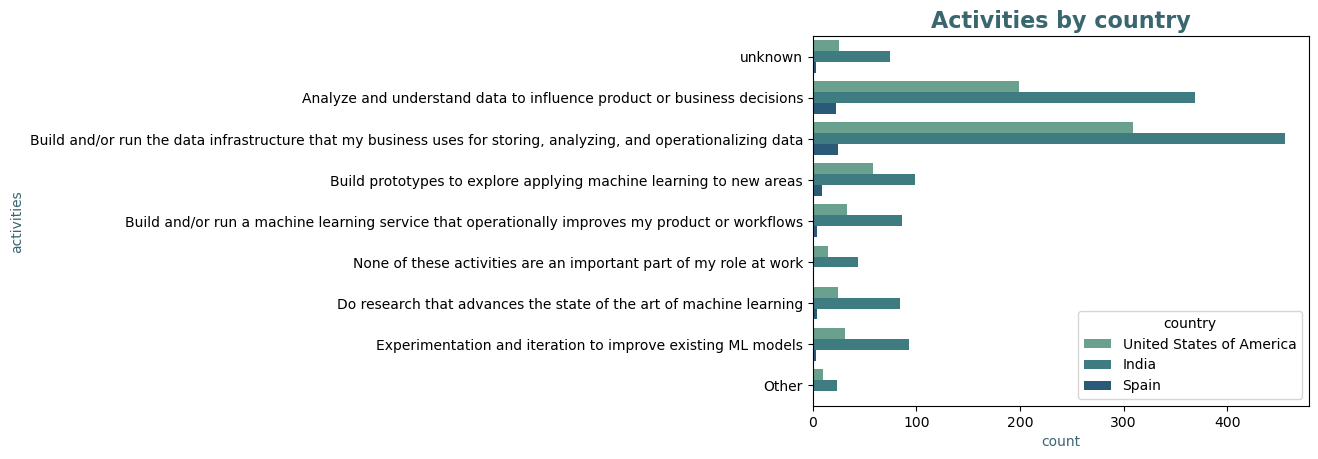

In [27]:
sns.countplot(y = 'activities', data = paises, hue = 'country', palette="crest");
plt.title("Activities by country", color = "#3a6670", fontweight='bold', fontsize = 16);
plt.xlabel("count", color = "#3a6670");
plt.ylabel("activities", color = "#3a6670");


## Conclusiones

Como observamos, el gráfico nos muestra que las actividades que más se realizan a diario son: 

1. Construir y/o ejecutar la infraestructura de datos que mi empresa utiliza para almacenar, analizar y poner en funcionamiento datos (crear la infraestructura necesaria para almacenar y trabajar con nuestros datos)

2. Analizar y entender los datos  para influir en las deciciones de negocio y productos (analizar y entender datos)

Por otro lado, las actividades que menos realizan los usuarios son: 

1. Realizar investigaciones sobre los avances acerca de machine mearning

2. Construir un servicio de machine learning que mejore el flujo de trabjo